11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 36ms/step - accuracy: 0.8982 - loss: 0.3361 - val_accuracy: 0.9843 - val_loss: 0.0511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9857 - loss: 0.0465 - val_accuracy: 0.9863 - val_loss: 0.0432
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9897 - loss: 0.0327 - val_accuracy: 0.9869 - val_loss: 0.0419
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9917 - loss: 0.0249 - val_accuracy: 0.9897 - val_loss: 0.0380
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9897 - val_loss: 0.0299
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9864 - loss: 0.0394
Test Accuracy: 0.9897000193595886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


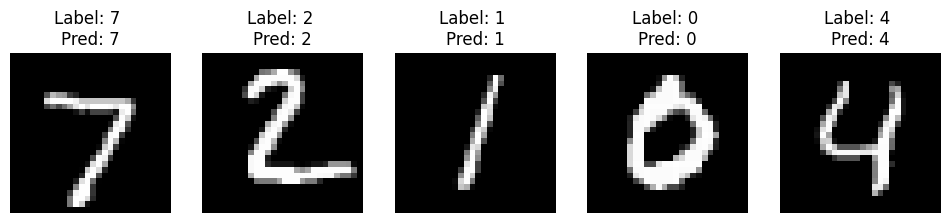

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset for simplicity
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_acc}")

# Plotting some images along with model predictions
def plot_images(images, labels, predictions=None, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        img = images[i].reshape(28, 28)
        ax = axes[i]
        ax.imshow(img, cmap='gray')
        if predictions is not None:
            ax.set_title(f"Label: {labels[i]} \nPred: {predictions[i]}")
        else:
            ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.show()

# Get predictions for test images
predictions = np.argmax(model.predict(test_images[:5]), axis=-1)

# Display some images with their predicted labels
plot_images(test_images, test_labels, predictions)